In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2022-08-26 13:32:37.811195: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
#loading the data from the csv file into a pandas dataframe
df = pd.read_csv("../input/hand-written-charrecognition/chardata.csv")
df.shape

(372450, 785)

In [3]:
df.rename(columns={'0':'label'}, inplace= True)

In [4]:
#Splitting the dataset into target vector and label array
X = df.drop("label", axis= 1).values
y = df["label"].values

print(f"Shape of X and y: {X.shape, y.shape}")

Shape of X and y: ((372450, 784), (372450,))


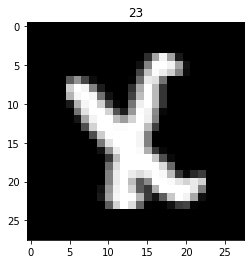

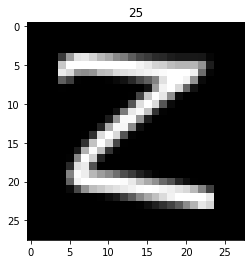

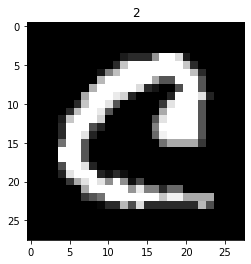

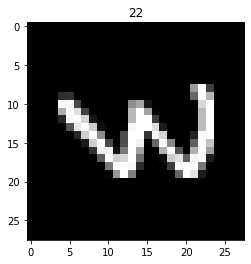

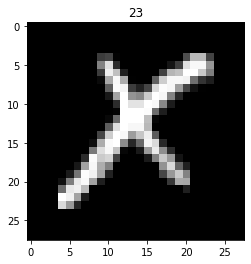

In [5]:
#printing 5 random images to gain info about the dataset
for i in range(5):
    k = np.random.randint(low= 0,high= 372450)
    plt.imshow(X[k,:].reshape(28,28), cmap="gray")
    plt.title(y[k])
    plt.show()

In [6]:
#creating the NN model
model = Sequential(
    [
        tf.keras.Input(shape=(784,),),
        Dense(200, activation= "relu"),
        Dense(150, activation= "relu"),
        Dense(100, activation= "relu"),
        Dense(50, activation= "relu"),
        Dense(26, activation= "linear")
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 26)                1326      
Total params: 208,626
Trainable params: 208,626
Non-trainable params: 0
_________________________________________________________________


2022-08-26 13:33:12.499893: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-08-26 13:33:12.503182: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-08-26 13:33:12.569005: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-26 13:33:12.569814: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2022-08-26 13:33:12.569893: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-08-26 13:33:12.604348: I tensorflow/stream_executor/platform/def

In [7]:
#splitting the dataset into training set and test set 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.95)

print(f"Shape of X_test and X_train: {X_test.shape, X_train.shape}")

Shape of X_test and X_train: ((18623, 784), (353827, 784))


In [8]:
#splitting the test set into test set and cross validation set

X_test, X_cv, y_test, y_cv = train_test_split(X_test, y_test, train_size= 0.4)

print(f"Shape of X_test and X_cv: {X_test.shape, X_cv.shape}")

Shape of X_test and X_cv: ((7449, 784), (11174, 784))


In [9]:
#compiling the model and fitting it to the training set

model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
    optimizer= tf.keras.optimizers.Adam(0.0003)
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 26)                1326      
Total params: 208,626
Trainable params: 208,626
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(X_train, y_train, epochs= 50)

2022-08-26 13:33:17.673382: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2219202944 exceeds 10% of free system memory.
2022-08-26 13:33:19.980511: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-08-26 13:33:19.993028: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000179999 Hz


Epoch 1/50


2022-08-26 13:33:20.405468: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11


   87/11058 [..............................] - ETA: 19s - loss: 23.3472  

2022-08-26 13:33:21.292841: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11


11058/11058 [==============================] - 21s 2ms/step - loss: 1.5574
Epoch 2/50
11058/11058 [==============================] - 20s 2ms/step - loss: 0.1789
Epoch 3/50
11058/11058 [==============================] - 20s 2ms/step - loss: 0.1183
Epoch 4/50
11058/11058 [==============================] - 20s 2ms/step - loss: 0.0903
Epoch 5/50
11058/11058 [==============================] - 20s 2ms/step - loss: 0.0747
Epoch 6/50
11058/11058 [==============================] - 20s 2ms/step - loss: 0.0642
Epoch 7/50
11058/11058 [==============================] - 19s 2ms/step - loss: 0.0579
Epoch 8/50
11058/11058 [==============================] - 20s 2ms/step - loss: 0.0523
Epoch 9/50
11058/11058 [==============================] - 20s 2ms/step - loss: 0.0481
Epoch 10/50
11058/11058 [==============================] - 20s 2ms/step - loss: 0.0449
Epoch 11/50
11058/11058 [==============================] - 20s 2ms/step - loss: 0.0422
Epoch 12/50
11058/11058 [==============================] - 19s 

In [11]:
pred = model.predict(X_cv)

c = 0.
m = X_cv.shape[0]

for i in range(m):
    if(np.argmax(pred[i])!= y_cv[i]):
        c += 1


In [12]:
print(f"Model accuaracy: {100- (c/m)*100}")

Model accuaracy: 98.91712904957939


In [14]:
model.save("CharRecognition.h5")